In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder

import keras
from keras import layers
from keras import ops

In [9]:
def getValue(start: float, end: float) -> float:
    val = random.uniform(start, end)
    return round(val, 2)

In [10]:

mRPS = [getValue(0, 1) for i in range(100)]
latency = [getValue(10, 500) for i in range(100)]
reliability = [getValue(0.9, 1.0) for i in range(100)]

In [11]:
data = pd.DataFrame([mRPS, latency, reliability]).T
data.columns = ['mRPS', 'Latency', 'Reliability']

In [12]:
data

,mRPS,Latency,Reliability
0,0.71,263.27,0.96
1,0.17,489.05,0.97
2,0.45,96.53,0.97
3,0.85,473.76,0.99
4,0.75,345.96,0.95
...,...,...,...
95,0.76,90.36,0.99
96,0.52,261.82,0.99
97,0.62,79.83,0.98
98,0.00,234.28,0.95


In [171]:
totalVals = 5000
def trucData(min, max, mu, sigma, myType = 'float', num=totalVals):
    tr = []
    while True:
        tmp = np.random.normal(mu, sigma, 1)
        if ((tmp >=min) and (tmp <= max)):
            if myType == 'int':
                tr.append(tmp[0].astype(int))
            else:
                tr.append(round(tmp[0].astype(float), 2))
        if (len(tr) == totalVals):
            break
    return tr

In [172]:
devices = ['Device1', 'Device1', 'Device3', 'Device4', 'Device5']
deviceList = [devices[random.randint(0, 4)] for i in range(totalVals)]
priorityScore = trucData(0.5, 1.0, 0.75, 0.15)
pendingData = trucData(50, 200, 125, 50, 'int')
timeSinceLastTransmission = trucData(1, 20, 10.5, 5.7)
failureCount = trucData(0, 4, 2, 1.5, 'int')
backOffTime = trucData(15, 1023, 511, 341, 'int')

In [173]:
data = pd.DataFrame([deviceList, priorityScore, pendingData, timeSinceLastTransmission, failureCount]).T
data.columns = ['Device', 'Priority Score', 'Pending Data', 'Time Since Last Transmission', 'Failure Count']
data['Max Failures'] = 5
data['Back Off Time'] = backOffTime

In [174]:
data

,Device,Priority Score,Pending Data,Time Since Last Transmission,Failure Count,Max Failures,Back Off Time
0,Device4,0.78,124,15.5,0,5,330
1,Device5,0.62,144,18.4,2,5,776
2,Device5,0.78,128,15.06,1,5,460
3,Device3,0.94,141,9.17,0,5,402
4,Device3,0.91,143,16.27,1,5,859
...,...,...,...,...,...,...,...
4995,Device4,0.69,101,16.84,1,5,82
4996,Device1,0.77,63,6.73,0,5,123
4997,Device1,0.61,132,18.63,2,5,655
4998,Device4,0.84,101,6.02,3,5,728


In [ ]:
a = [1, 0.593, 150.91, 8.48, 0, 5]

In [175]:
le = LabelEncoder()
uut = le.fit_transform(data['Device'])
data['Device'] = uut

In [176]:
data[['Priority Score', 'Pending Data', 'Time Since Last Transmission', 'Failure Count']] = data[['Priority Score', 'Pending Data', 'Time Since Last Transmission', 'Failure Count']].astype(float)

In [177]:
data.describe()

,Device,Priority Score,Pending Data,Time Since Last Transmission,Failure Count,Max Failures,Back Off Time
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.000000
mean,1.191000,0.751656,123.549800,10.495302,1.470400,5.0,517.119000
std,1.163611,0.119719,37.595667,4.581234,1.005647,0.0,251.095116
min,0.000000,0.500000,50.000000,1.020000,0.000000,5.0,15.000000
25%,0.000000,0.660000,94.000000,7.010000,1.000000,5.0,321.000000
50%,1.000000,0.750000,124.000000,10.540000,1.000000,5.0,512.000000
75%,2.000000,0.840000,152.000000,13.910000,2.000000,5.0,712.250000
max,3.000000,1.000000,199.000000,19.990000,3.000000,5.0,1022.000000


In [178]:
X = data[['Device', 'Priority Score', 'Pending Data', 'Time Since Last Transmission', 'Failure Count', 'Max Failures']].values

In [179]:
y = data['Back Off Time'].values

In [180]:
X, y = shuffle(X, y, random_state=1813)

In [181]:
# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        layers.Dense(256, activation="relu", name="layer1"),
        layers.Dense(128, activation="relu", name="layer2"),
        layers.Dense(64, activation="relu", name="layer3"),
        layers.Dense(32, activation="relu", name="layer4"),
        layers.Dense(16, activation="relu", name="layer5"),
        layers.Dense(1, activation='linear', name="layer6"),
    ]
)

In [182]:
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model.fit(X, y, validation_split=0.25, epochs=100)

Epoch 1/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 157662.7188 - mean_squared_error: 157662.7188 - val_loss: 76723.6797 - val_mean_squared_error: 76723.6797
Epoch 2/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 80453.0547 - mean_squared_error: 80453.0547 - val_loss: 79481.5469 - val_mean_squared_error: 79481.5469
Epoch 3/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 79024.6484 - mean_squared_error: 79024.6484 - val_loss: 69390.2656 - val_mean_squared_error: 69390.2656
Epoch 4/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 74205.5156 - mean_squared_error: 74205.5156 - val_loss: 71114.8828 - val_mean_squared_error: 71114.8828
Epoch 5/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 72557.9531 - mean_squared_error: 72557.9531 - val_loss: 68821.1875 - val_mean_squared_error: 68821.1875
Epoch 6/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 74526.1094 - mean_squared_error: 74526.1094 - val_loss: 64114.2344 - val_mean_squared_error: 64114.2344
Epoch 7

In [183]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 256)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer3 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer4 (Dense)                  │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer5 (Dense)                  │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer6 (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,709 (534.02 KB)

 Trainable params: 45,569 (178.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 91,140 (356.02 KB)

In [184]:
model.evaluate(X, y)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 65449.6250 - mean_squared_error: 65449.6250


[64074.99609375, 64074.99609375]

In [218]:

for i in range(10):
    print (f'Actual: {y[i]} : Predicted: {model.predict(np.expand_dims(X[i], axis=0), verbose=0)[0][0].astype(int)}')

Actual: 274 : Predicted: 587
Actual: 487 : Predicted: 548
Actual: 700 : Predicted: 528
Actual: 468 : Predicted: 535
Actual: 851 : Predicted: 548
Actual: 562 : Predicted: 539
Actual: 625 : Predicted: 551
Actual: 923 : Predicted: 587
Actual: 694 : Predicted: 568
Actual: 677 : Predicted: 501


In [204]:
z = model.predict(X, verbose=0).astype(int)

array([[587],
       [548],
       [528],
       ...,
       [544],
       [510],
       [520]])

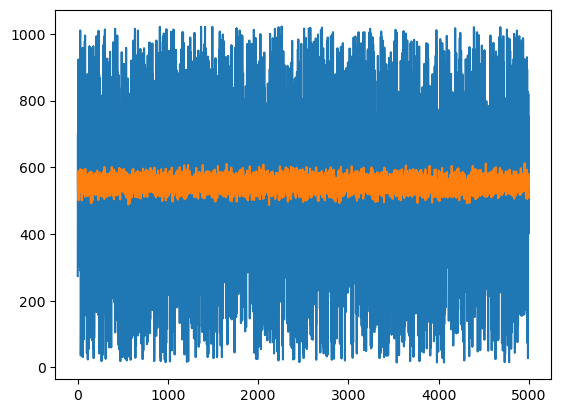

In [206]:
plt.plot(y)
plt.plot(z)

In [186]:
import xgboost as xg 

In [215]:
# Instantiation 
xgb_r = xg.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 10, seed = 123, n_jobs=-1)

In [216]:
# Fitting the model 
xgb_r.fit(X, y) 
  
# # Predict the model 
# pred = xgb_r.predict(test_X) 
  
# # RMSE Computation 
# rmse = np.sqrt(MSE(test_y, pred)) 
# print("RMSE : % f" %(rmse)) 

c:\ProgramData\Anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:58:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=-1,
             num_parallel_tree=None, objective='reg:linear', ...)

In [217]:
for i in range(10):
    print (f'Actual: {y[i]} : Predicted: {xgb_r.predict(np.expand_dims(X[i], axis=0))[0].astype(int)}')

Actual: 274 : Predicted: 514
Actual: 487 : Predicted: 463
Actual: 700 : Predicted: 498
Actual: 468 : Predicted: 497
Actual: 851 : Predicted: 543
Actual: 562 : Predicted: 533
Actual: 625 : Predicted: 538
Actual: 923 : Predicted: 655
Actual: 694 : Predicted: 607
Actual: 677 : Predicted: 495


In [190]:
i = 100
print (y[i], xgb_r.predict(np.expand_dims(X[i], axis=0))[0].astype(int))

371 511


In [191]:
z = xgb_r.predict(np.array(X).reshape(-1, 6)).astype(int)

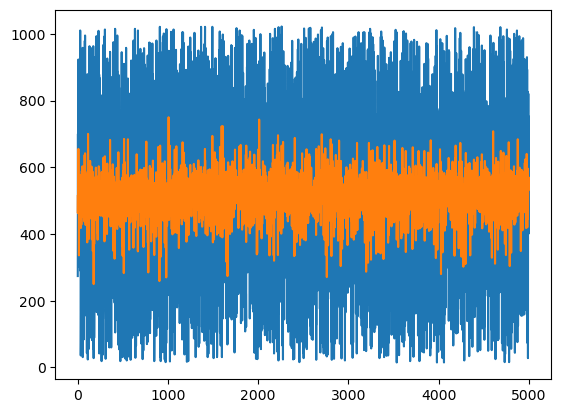

In [192]:
plt.plot(y)
plt.plot(z)

In [207]:
X

array([[  0.  ,   0.95, 155.  ,  14.35,   1.  ,   5.  ],
       [  0.  ,   0.62, 124.  ,  12.09,   1.  ,   5.  ],
       [  1.  ,   0.8 ,  59.  ,  11.71,   2.  ,   5.  ],
       ...,
       [  0.  ,   0.55, 132.  ,  15.84,   1.  ,   5.  ],
       [  3.  ,   0.59, 104.  ,   5.32,   3.  ,   5.  ],
       [  2.  ,   0.58, 127.  ,   4.39,   3.  ,   5.  ]])

In [232]:
a = [1, 0.593, 150.91, 8.48, 0, 5]

In [233]:
a = np.array(np.expand_dims(a, axis=0))

In [234]:
xgb_r.predict(a)

array([524.724], dtype=float32)

In [235]:
model.predict(a)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


array([[555.47235]], dtype=float32)

In [237]:
data.to_csv('test.csv')